In [234]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import category_encoders as ce
from numpy import percentile
from sklearn.model_selection import train_test_split


filename = "data/" + "0"+ str(25) + '/'
        
measurements = pd.read_csv(filename+ "measurements.csv")
stations = pd.read_csv(filename+ "stations.csv")

measurements = pd.read_csv(filename+ "measurements.csv",sep ='\t')
stations = pd.read_csv(filename+ "stations.csv",sep ='\t')

<h2> Merge dát

In [204]:
stations.drop('QoS', inplace=True, axis=1)
stations.drop('revision', inplace=True, axis=1)
merged_df = pd.merge( measurements, stations, left_on=["longitude", "latitude"], right_on=["longitude", "latitude"])
merged_df.sort_values('PM10')

,PM10,NH3,warning,H2CO,SO2,TEMP,C2H3NO5,Pb,NOx,PM2.5,latitude,PRES,longitude,CH4,PAHs,CFCs,CO,O3,location,code
9687,0.48041,7.62055,1.0,40.44831,8.95500,33.01083,0.01639,25.59263,2.32458,8.84929,36.53333,1076.69279,136.61667,6.40594,8.91931,35.59143,8.02313,8.69905,Asia/Tokyo,JP
9688,0.48041,7.62055,1.0,40.44831,8.95500,33.01083,0.01639,25.59263,2.32458,8.84929,36.53333,1076.69279,136.61667,6.40594,8.91931,35.59143,8.02313,8.69905,Asia/Tokyo,JP
18605,1.41052,6.28571,1.0,67.44298,10.21731,1.49123,0.01321,27.54902,1.48372,8.49966,40.63316,1196.73988,-74.13653,7.23057,9.41066,48.73478,8.26738,8.61002,America/New_York,US
18604,1.41052,6.28571,1.0,67.44298,10.21731,1.49123,0.01321,27.54902,1.48372,8.49966,40.63316,1196.73988,-74.13653,7.23057,9.41066,48.73478,8.26738,8.61002,America/New_York,US
23758,1.92294,6.12330,0.0,42.49213,8.92464,18.74332,0.02261,56.03857,10.65109,8.45716,52.86147,1139.68250,9.59260,5.64244,6.94828,58.53332,10.98644,8.19369,Europe/Berlin,DE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24502,NaN,7.92027,1.0,56.36417,9.22568,8.87750,0.03296,29.52946,7.60894,8.20905,46.75451,1139.17859,33.34864,9.20933,5.88914,46.94777,7.69299,9.74332,Europe/Kiev,UA
24503,NaN,7.92027,1.0,56.36417,9.22568,8.87750,0.03296,29.52946,7.60894,8.20905,46.75451,1139.17859,33.34864,9.20933,5.88914,46.94777,7.69299,9.74332,Europe/Kiev,UA
24654,NaN,7.55891,1.0,55.44134,9.63176,5.57682,0.03027,52.67479,5.24887,5.75450,33.44872,1074.19602,-86.78777,7.72184,10.33559,45.18717,10.51719,6.85583,America/Chicago,US
24712,NaN,5.06021,1.0,63.90338,9.04240,NaN,0.02968,79.33649,6.58649,7.56180,43.61062,1177.71705,-72.97261,6.42209,6.94363,29.45282,6.14840,6.61491,America/New_York,US


<h2> Integrácia a čistenie dát

<h3> Enumeracia a čistenie hodnôt

In [212]:
merged_df = merged_df.drop_duplicates(keep='first')
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11922 entries, 0 to 25078
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PM10       11874 non-null  float64
 1   NH3        11874 non-null  float64
 2   warning    11874 non-null  float64
 3   H2CO       11874 non-null  float64
 4   SO2        11874 non-null  float64
 5   TEMP       11874 non-null  float64
 6   C2H3NO5    11874 non-null  float64
 7   Pb         11874 non-null  float64
 8   NOx        11874 non-null  float64
 9   PM2.5      11874 non-null  float64
 10  latitude   11922 non-null  float64
 11  PRES       11922 non-null  float64
 12  longitude  11922 non-null  float64
 13  CH4        11874 non-null  float64
 14  PAHs       11874 non-null  float64
 15  CFCs       11874 non-null  float64
 16  CO         11874 non-null  float64
 17  O3         11874 non-null  float64
 18  location   11922 non-null  object 
 19  code       11922 non-null  object 
dtypes: flo

In [213]:
"""stations['QoS'] = stations['QoS'].str.replace('accep' , 'acceptable')
stations['QoS'] = stations['QoS'].str.replace('maitennce' , 'maintenance')

stations.QoS = pd.Categorical(stations.QoS)
stations['QoS'] = stations.QoS.cat.codes
stations"""

"stations['QoS'] = stations['QoS'].str.replace('accep' , 'acceptable')\nstations['QoS'] = stations['QoS'].str.replace('maitennce' , 'maintenance')\n\nstations.QoS = pd.Categorical(stations.QoS)\nstations['QoS'] = stations.QoS.cat.codes\nstations"

In [214]:
"""stations.code = pd.Categorical(stations.code)
stations['code'] = stations.code.cat.codes
stations"""

"stations.code = pd.Categorical(stations.code)\nstations['code'] = stations.code.cat.codes\nstations"

In [215]:
"""stations['revision'] = stations['revision'].str.replace(', 00:00:00' , '')
stations['revision'] = stations['revision'].str.replace('/' , '-')
stations['revision'] = stations['revision'].str.replace(' ' , '-')

stations['revision'] = stations['revision'].str.replace('Jan' , '01')
stations['revision'] = stations['revision'].str.replace('Feb' , '02')
stations['revision'] = stations['revision'].str.replace('Mar' , '03')
stations['revision'] = stations['revision'].str.replace('Apr' , '04')
stations['revision'] = stations['revision'].str.replace('May' , '05')
stations['revision'] = stations['revision'].str.replace('Jun' , '06')
stations['revision'] = stations['revision'].str.replace('Jul' , '07')
stations['revision'] = stations['revision'].str.replace('Aug' , '08')
stations['revision'] = stations['revision'].str.replace('Aug' , '09')
stations['revision'] = stations['revision'].str.replace('Oct' , '10')
stations['revision'] = stations['revision'].str.replace('Aug' , '11')
stations['revision'] = stations['revision'].str.replace('Dec' , '12')

stations['revision'] = stations['revision'].astype('datetime64')
stations['revision']
"""

"stations['revision'] = stations['revision'].str.replace(', 00:00:00' , '')\nstations['revision'] = stations['revision'].str.replace('/' , '-')\nstations['revision'] = stations['revision'].str.replace(' ' , '-')\n\nstations['revision'] = stations['revision'].str.replace('Jan' , '01')\nstations['revision'] = stations['revision'].str.replace('Feb' , '02')\nstations['revision'] = stations['revision'].str.replace('Mar' , '03')\nstations['revision'] = stations['revision'].str.replace('Apr' , '04')\nstations['revision'] = stations['revision'].str.replace('May' , '05')\nstations['revision'] = stations['revision'].str.replace('Jun' , '06')\nstations['revision'] = stations['revision'].str.replace('Jul' , '07')\nstations['revision'] = stations['revision'].str.replace('Aug' , '08')\nstations['revision'] = stations['revision'].str.replace('Aug' , '09')\nstations['revision'] = stations['revision'].str.replace('Oct' , '10')\nstations['revision'] = stations['revision'].str.replace('Aug' , '11')\nstat

<h3> Chýbajúce hodnoty

C:\Users\Imr\AppData\Local\Temp\ipykernel_15780\2531675599.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_helper.corr(), ax=ax, annot=True, fmt=".3f")


<AxesSubplot: >

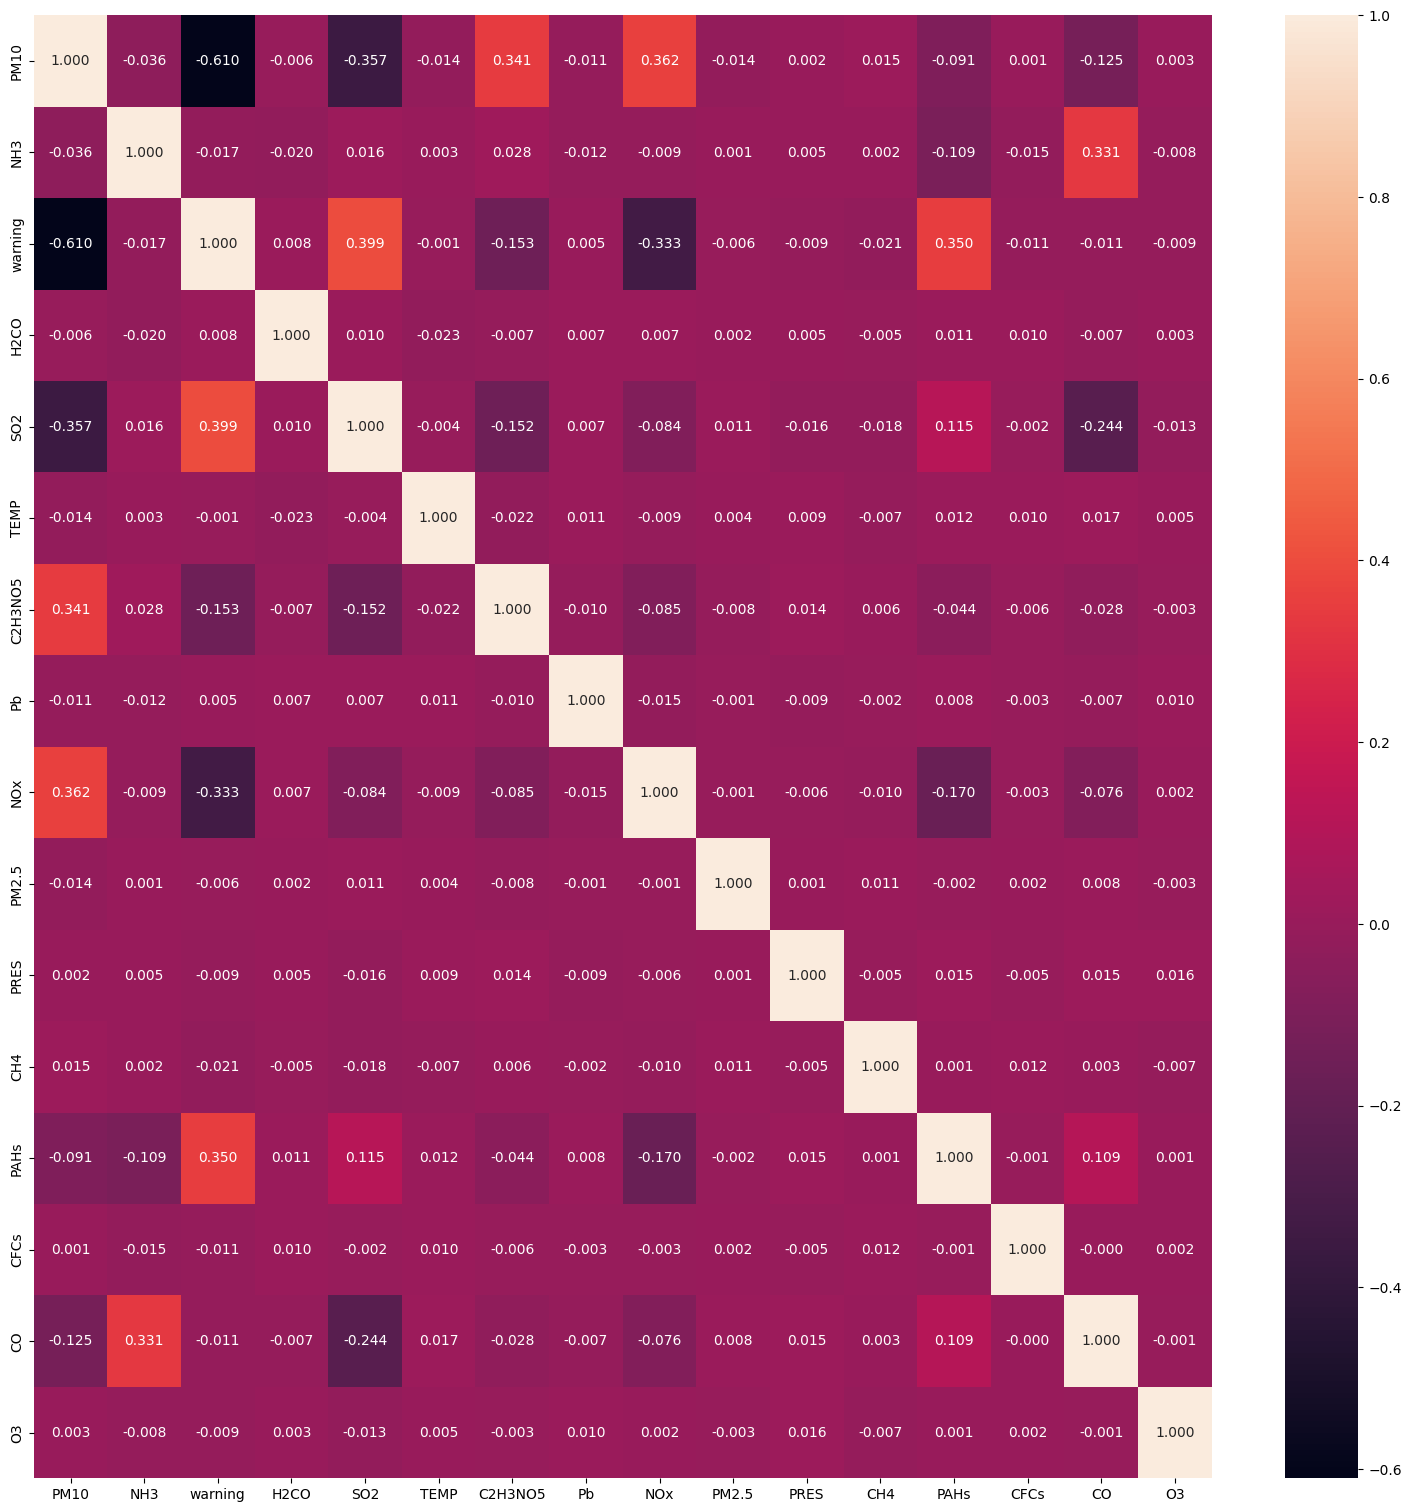

In [216]:
df_helper = merged_df.copy()
df_helper.drop('latitude', inplace=True, axis=1)
df_helper.drop('longitude', inplace=True, axis=1)
df_helper.drop('location', inplace=True, axis=1)
fig, ax = plt.subplots(figsize=(19,19))
sns.heatmap(df_helper.corr(), ax=ax, annot=True, fmt=".3f")

1. spôsob - odstranenie riadky s Nan

In [217]:
df_notNaN = merged_df.dropna()
df_notNaN

,PM10,NH3,warning,H2CO,SO2,TEMP,C2H3NO5,Pb,NOx,PM2.5,latitude,PRES,longitude,CH4,PAHs,CFCs,CO,O3,location,code
0,7.74502,5.66554,1.0,57.03615,10.02018,16.75126,0.04167,40.93202,7.87154,9.92285,52.26083,1182.31351,7.00417,8.53092,6.71732,33.24445,6.57774,10.20087,Europe/Amsterdam,NL
1,9.19988,8.69691,0.0,36.08124,7.22592,-2.27734,0.13049,27.76991,11.34923,9.44371,52.26083,1127.37585,7.00417,9.42485,7.08347,47.39045,5.12461,7.48897,Europe/Amsterdam,NL
3,12.07679,7.31197,0.0,69.76080,7.13670,30.22012,1.85071,69.69690,5.71201,9.38742,52.26083,1071.47119,7.00417,7.13162,7.56315,62.08844,8.60372,8.06096,Europe/Amsterdam,NL
4,9.93780,6.72407,0.0,46.01395,10.26269,0.02751,0.23759,46.81255,6.11025,7.44149,52.26083,1194.42875,7.00417,8.60356,7.76513,27.07563,5.33211,9.46192,Europe/Amsterdam,NL
5,10.49768,7.88652,0.0,24.04195,8.22030,36.58162,0.39975,56.99782,10.13536,9.53870,52.26083,1197.44824,7.00417,8.92562,4.91792,50.23638,6.43893,7.01875,Europe/Amsterdam,NL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25074,5.48659,8.08125,1.0,16.81344,8.90944,41.94482,0.02135,49.02013,5.65448,6.71573,36.60090,1082.61222,126.66500,9.77226,9.84302,37.80398,10.33177,8.71820,Asia/Seoul,KR
25075,8.35377,6.62863,0.0,61.04381,9.17051,15.11938,0.06572,55.55084,9.18283,6.04759,36.60090,1163.81194,126.66500,8.60282,7.11961,63.42805,7.05525,7.54919,Asia/Seoul,KR
25076,9.73372,8.51869,0.0,76.61218,7.79681,-0.94018,0.20473,28.74120,6.56890,8.00890,36.60090,1065.41843,126.66500,9.15373,7.70164,57.47791,8.77038,7.00583,Asia/Seoul,KR
25077,8.76141,8.31462,0.0,53.96995,6.91148,24.00254,0.09612,32.50681,7.37873,9.71030,36.60090,1072.08096,126.66500,7.40329,6.58851,49.09242,9.69961,8.44219,Asia/Seoul,KR


C:\Users\Imr\AppData\Local\Temp\ipykernel_15780\4284167662.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_helper.corr(), ax=ax, annot=True, fmt=".3f")


<AxesSubplot: >

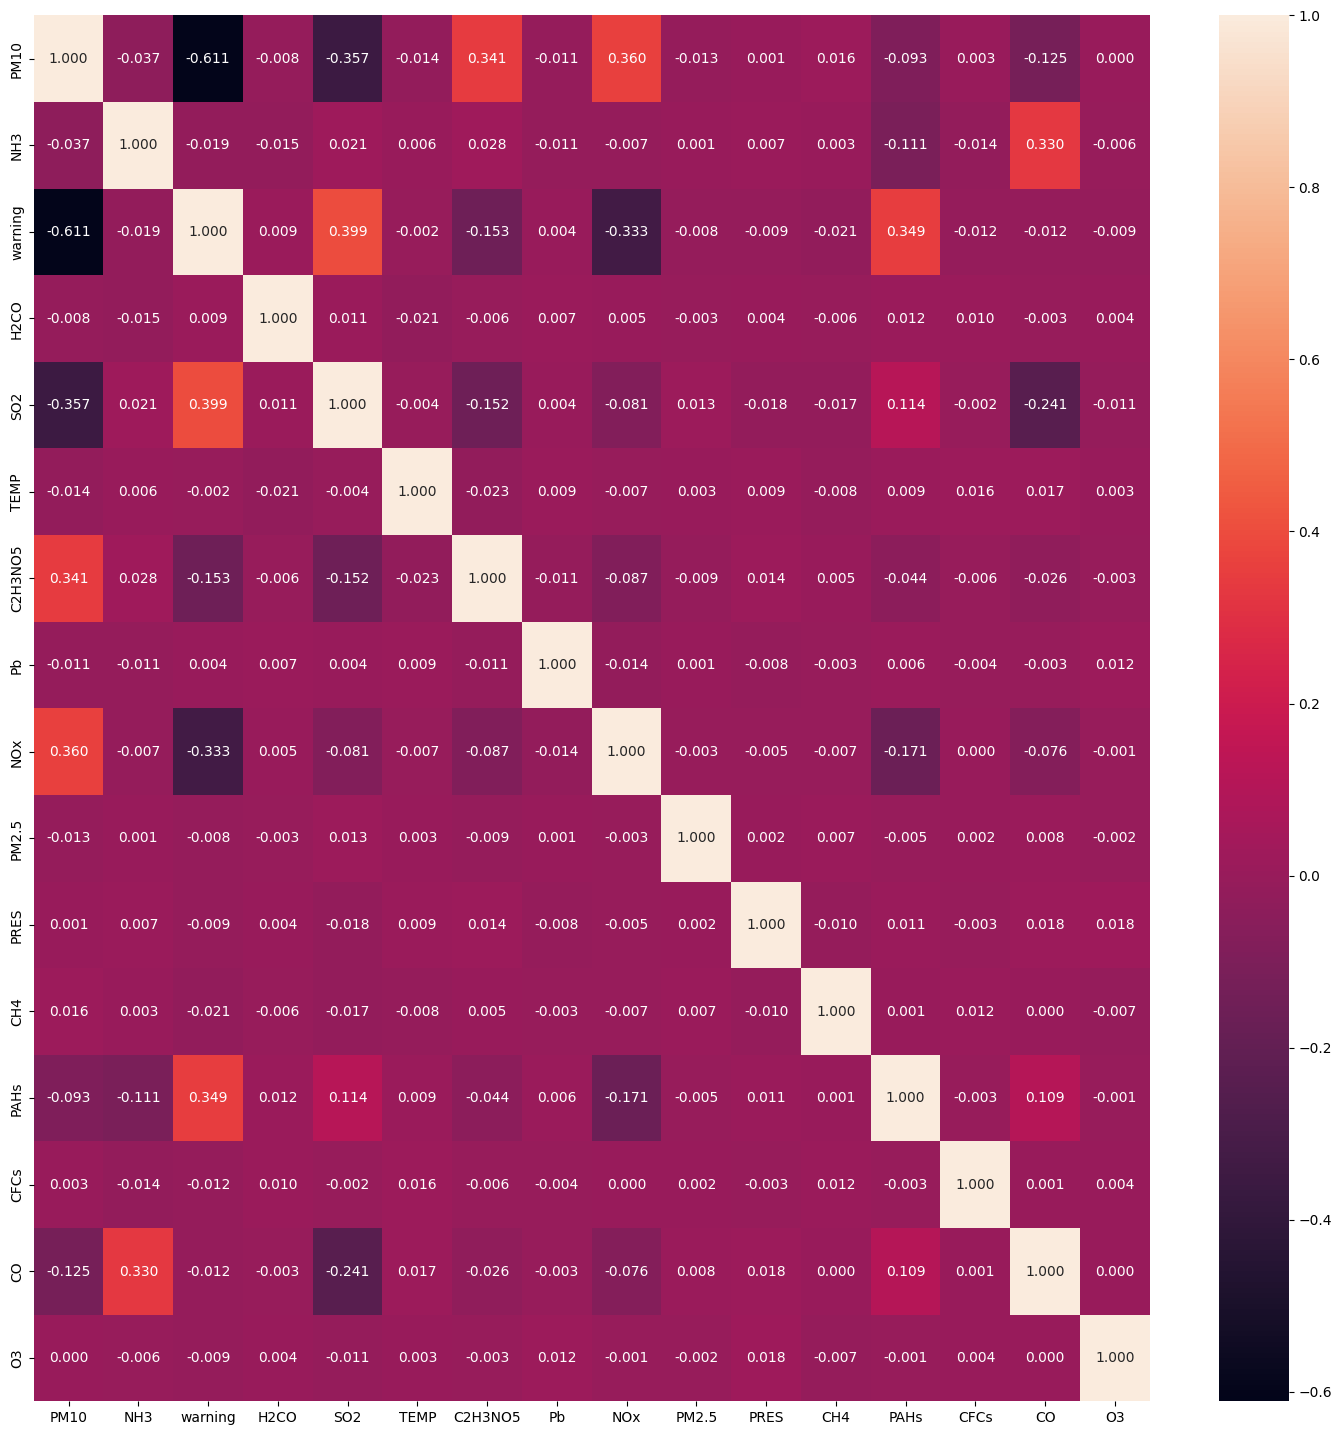

In [218]:
df_helper = df_notNaN.copy()
df_helper.drop('latitude', inplace=True, axis=1)
df_helper.drop('longitude', inplace=True, axis=1)
df_helper.drop('location', inplace=True, axis=1)
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(df_helper.corr(), ax=ax, annot=True, fmt=".3f")

2. spôsob - nahradenie Nan hodnoty s mean stlpcov

In [227]:
df_median = merged_df.copy()
for key, value in merged_df.items():
    if key == 'location' or  key == 'code':
        continue
    df_median[key] = merged_df[key].fillna(merged_df[key].median())
    

In [228]:
df_median

,PM10,NH3,warning,H2CO,SO2,TEMP,C2H3NO5,Pb,NOx,PM2.5,latitude,PRES,longitude,CH4,PAHs,CFCs,CO,O3,location,code
0,7.74502,5.66554,1.0,57.03615,10.02018,16.75126,0.04167,40.93202,7.87154,9.92285,52.26083,1182.31351,7.00417,8.53092,6.71732,33.24445,6.57774,10.20087,Europe/Amsterdam,NL
1,9.19988,8.69691,0.0,36.08124,7.22592,-2.27734,0.13049,27.76991,11.34923,9.44371,52.26083,1127.37585,7.00417,9.42485,7.08347,47.39045,5.12461,7.48897,Europe/Amsterdam,NL
2,6.31859,6.23097,1.0,64.61840,9.56617,12.25127,0.02591,41.72744,7.09074,8.26135,52.26083,1133.72497,7.00417,8.61704,7.77413,55.14021,5.48395,7.16817,Europe/Amsterdam,NL
3,12.07679,7.31197,0.0,69.76080,7.13670,30.22012,1.85071,69.69690,5.71201,9.38742,52.26083,1071.47119,7.00417,7.13162,7.56315,62.08844,8.60372,8.06096,Europe/Amsterdam,NL
4,9.93780,6.72407,0.0,46.01395,10.26269,0.02751,0.23759,46.81255,6.11025,7.44149,52.26083,1194.42875,7.00417,8.60356,7.76513,27.07563,5.33211,9.46192,Europe/Amsterdam,NL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25074,5.48659,8.08125,1.0,16.81344,8.90944,41.94482,0.02135,49.02013,5.65448,6.71573,36.60090,1082.61222,126.66500,9.77226,9.84302,37.80398,10.33177,8.71820,Asia/Seoul,KR
25075,8.35377,6.62863,0.0,61.04381,9.17051,15.11938,0.06572,55.55084,9.18283,6.04759,36.60090,1163.81194,126.66500,8.60282,7.11961,63.42805,7.05525,7.54919,Asia/Seoul,KR
25076,9.73372,8.51869,0.0,76.61218,7.79681,-0.94018,0.20473,28.74120,6.56890,8.00890,36.60090,1065.41843,126.66500,9.15373,7.70164,57.47791,8.77038,7.00583,Asia/Seoul,KR
25077,8.76141,8.31462,0.0,53.96995,6.91148,24.00254,0.09612,32.50681,7.37873,9.71030,36.60090,1072.08096,126.66500,7.40329,6.58851,49.09242,9.69961,8.44219,Asia/Seoul,KR


C:\Users\Imr\AppData\Local\Temp\ipykernel_15780\2354054076.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_helper.corr(), ax=ax, annot=True, fmt=".3f")


<AxesSubplot: >

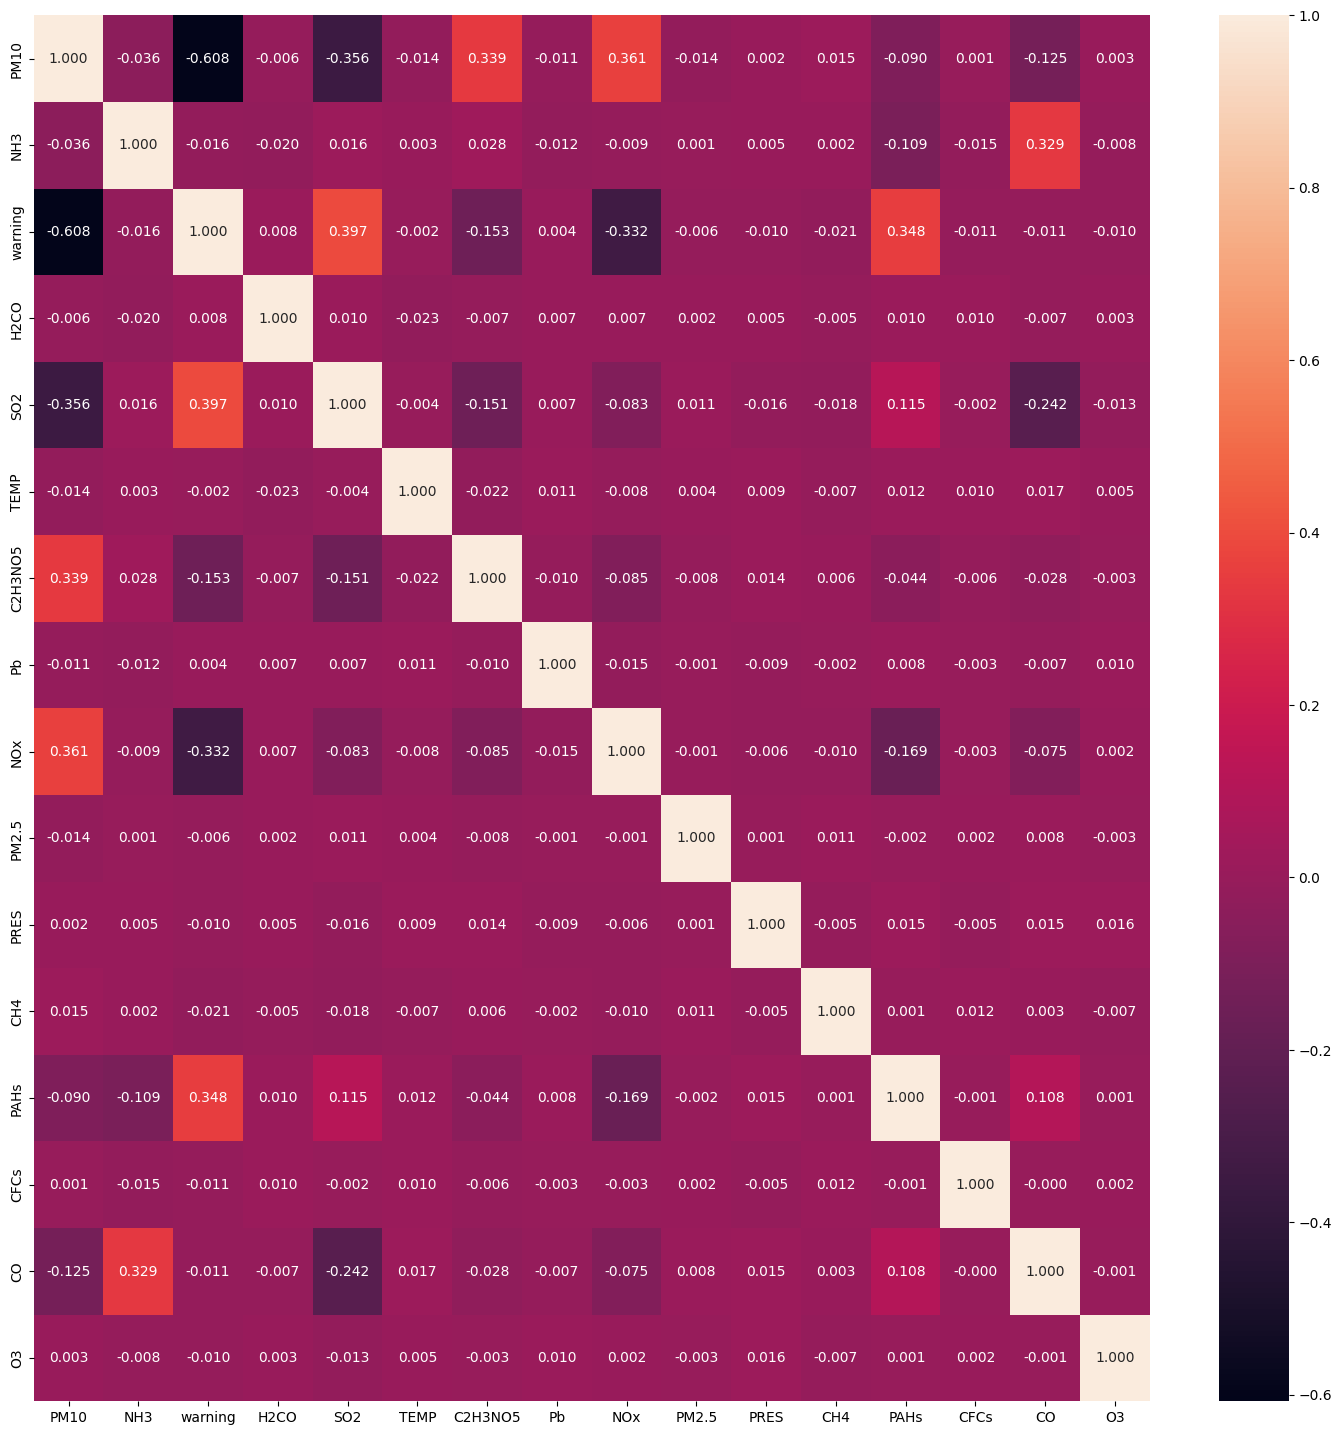

In [229]:
df_helper = df_median.copy()
df_helper.drop('latitude', inplace=True, axis=1)
df_helper.drop('longitude', inplace=True, axis=1)
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(df_helper.corr(), ax=ax, annot=True, fmt=".3f")

<h2> Vychýlene hodnoty

<h3>Odstraňovanie pomocou Smerodajnej odchýlky

In [230]:
df_median.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11922 entries, 0 to 25078
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PM10       11922 non-null  float64
 1   NH3        11922 non-null  float64
 2   warning    11922 non-null  float64
 3   H2CO       11922 non-null  float64
 4   SO2        11922 non-null  float64
 5   TEMP       11922 non-null  float64
 6   C2H3NO5    11922 non-null  float64
 7   Pb         11922 non-null  float64
 8   NOx        11922 non-null  float64
 9   PM2.5      11922 non-null  float64
 10  latitude   11922 non-null  float64
 11  PRES       11922 non-null  float64
 12  longitude  11922 non-null  float64
 13  CH4        11922 non-null  float64
 14  PAHs       11922 non-null  float64
 15  CFCs       11922 non-null  float64
 16  CO         11922 non-null  float64
 17  O3         11922 non-null  float64
 18  location   11922 non-null  object 
 19  code       11922 non-null  object 
dtypes: flo

In [231]:
df_median_mean, df_median_std = df_median.mean(), df_median.std()

# define outliers
cut_off = df_median_std * 3
lower, upper = df_median_mean - cut_off, df_median_mean + cut_off 
# identify outliers


for key, value in measurements.items():
    if key == 'warning' or key == 'code' or key == 'location':
        continue
    df_median_std = df_median[(df_median[key] <= upper[key]) & (df_median[key] >= lower[key])]

df_median_std

C:\Users\Imr\AppData\Local\Temp\ipykernel_15780\3708271594.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_median_mean, df_median_std = df_median.mean(), df_median.std()
C:\Users\Imr\AppData\Local\Temp\ipykernel_15780\3708271594.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_median_mean, df_median_std = df_median.mean(), df_median.std()


,PM10,NH3,warning,H2CO,SO2,TEMP,C2H3NO5,Pb,NOx,PM2.5,latitude,PRES,longitude,CH4,PAHs,CFCs,CO,O3,location,code
0,7.74502,5.66554,1.0,57.03615,10.02018,16.75126,0.04167,40.93202,7.87154,9.92285,52.26083,1182.31351,7.00417,8.53092,6.71732,33.24445,6.57774,10.20087,Europe/Amsterdam,NL
1,9.19988,8.69691,0.0,36.08124,7.22592,-2.27734,0.13049,27.76991,11.34923,9.44371,52.26083,1127.37585,7.00417,9.42485,7.08347,47.39045,5.12461,7.48897,Europe/Amsterdam,NL
2,6.31859,6.23097,1.0,64.61840,9.56617,12.25127,0.02591,41.72744,7.09074,8.26135,52.26083,1133.72497,7.00417,8.61704,7.77413,55.14021,5.48395,7.16817,Europe/Amsterdam,NL
3,12.07679,7.31197,0.0,69.76080,7.13670,30.22012,1.85071,69.69690,5.71201,9.38742,52.26083,1071.47119,7.00417,7.13162,7.56315,62.08844,8.60372,8.06096,Europe/Amsterdam,NL
4,9.93780,6.72407,0.0,46.01395,10.26269,0.02751,0.23759,46.81255,6.11025,7.44149,52.26083,1194.42875,7.00417,8.60356,7.76513,27.07563,5.33211,9.46192,Europe/Amsterdam,NL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25074,5.48659,8.08125,1.0,16.81344,8.90944,41.94482,0.02135,49.02013,5.65448,6.71573,36.60090,1082.61222,126.66500,9.77226,9.84302,37.80398,10.33177,8.71820,Asia/Seoul,KR
25075,8.35377,6.62863,0.0,61.04381,9.17051,15.11938,0.06572,55.55084,9.18283,6.04759,36.60090,1163.81194,126.66500,8.60282,7.11961,63.42805,7.05525,7.54919,Asia/Seoul,KR
25076,9.73372,8.51869,0.0,76.61218,7.79681,-0.94018,0.20473,28.74120,6.56890,8.00890,36.60090,1065.41843,126.66500,9.15373,7.70164,57.47791,8.77038,7.00583,Asia/Seoul,KR
25077,8.76141,8.31462,0.0,53.96995,6.91148,24.00254,0.09612,32.50681,7.37873,9.71030,36.60090,1072.08096,126.66500,7.40329,6.58851,49.09242,9.69961,8.44219,Asia/Seoul,KR


<h3>Odstraňovanie pomocou Smerodajnej odchýlky


In [232]:
# calculate interquartile range
q25, q75 = df_median.quantile(.25, axis = 0), df_median.quantile(.75, axis = 0)
iqr = q75 - q25

q25, q75 = percentile(df_median['PM10'], 25), percentile(df_median['PM10'], 75)

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off


for key, value in measurements.items():
    if key == 'warning' or key == 'code' or key == 'location':
        continue
    df_median_iqr = df_median[(df_median[key] <= upper[key]) & (df_median[key] >= lower[key])]

df_median_iqr

C:\Users\Imr\AppData\Local\Temp\ipykernel_15780\3596074973.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q25, q75 = df_median.quantile(.25, axis = 0), df_median.quantile(.75, axis = 0)


,PM10,NH3,warning,H2CO,SO2,TEMP,C2H3NO5,Pb,NOx,PM2.5,latitude,PRES,longitude,CH4,PAHs,CFCs,CO,O3,location,code
0,7.74502,5.66554,1.0,57.03615,10.02018,16.75126,0.04167,40.93202,7.87154,9.92285,52.26083,1182.31351,7.00417,8.53092,6.71732,33.24445,6.57774,10.20087,Europe/Amsterdam,NL
1,9.19988,8.69691,0.0,36.08124,7.22592,-2.27734,0.13049,27.76991,11.34923,9.44371,52.26083,1127.37585,7.00417,9.42485,7.08347,47.39045,5.12461,7.48897,Europe/Amsterdam,NL
2,6.31859,6.23097,1.0,64.61840,9.56617,12.25127,0.02591,41.72744,7.09074,8.26135,52.26083,1133.72497,7.00417,8.61704,7.77413,55.14021,5.48395,7.16817,Europe/Amsterdam,NL
3,12.07679,7.31197,0.0,69.76080,7.13670,30.22012,1.85071,69.69690,5.71201,9.38742,52.26083,1071.47119,7.00417,7.13162,7.56315,62.08844,8.60372,8.06096,Europe/Amsterdam,NL
4,9.93780,6.72407,0.0,46.01395,10.26269,0.02751,0.23759,46.81255,6.11025,7.44149,52.26083,1194.42875,7.00417,8.60356,7.76513,27.07563,5.33211,9.46192,Europe/Amsterdam,NL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25074,5.48659,8.08125,1.0,16.81344,8.90944,41.94482,0.02135,49.02013,5.65448,6.71573,36.60090,1082.61222,126.66500,9.77226,9.84302,37.80398,10.33177,8.71820,Asia/Seoul,KR
25075,8.35377,6.62863,0.0,61.04381,9.17051,15.11938,0.06572,55.55084,9.18283,6.04759,36.60090,1163.81194,126.66500,8.60282,7.11961,63.42805,7.05525,7.54919,Asia/Seoul,KR
25076,9.73372,8.51869,0.0,76.61218,7.79681,-0.94018,0.20473,28.74120,6.56890,8.00890,36.60090,1065.41843,126.66500,9.15373,7.70164,57.47791,8.77038,7.00583,Asia/Seoul,KR
25077,8.76141,8.31462,0.0,53.96995,6.91148,24.00254,0.09612,32.50681,7.37873,9.71030,36.60090,1072.08096,126.66500,7.40329,6.58851,49.09242,9.69961,8.44219,Asia/Seoul,KR


<h2> Realizácia predspracovania dát

In [236]:

train, test = train_test_split(df_median, test_size=0.3)